In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

#For Latitude and longitude
from geopy.geocoders import Nominatim
   

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

import os

# For Kaggle Notebooks. 
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""



"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [9]:

# filepath = os.path.join(dirname,filename) For importing files in kaggle. 


def read_dataset(filepath) : 
    data_import = pd.read_csv(filepath)
    return data_import 

data_import = read_dataset('customer_data.csv')
data_import.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [10]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


#### Observation : No null values , there are combination of object and numerical columns , shape of dataset is 1000 * 8.

In [11]:
# Let's check for duplicated values if any. 

print(f" Sum of duplicated rows: {data_import.duplicated().sum()}")

 Sum of duplicated rows: 0


In [12]:
# let's seperate out categorical cols and numerical cols to do some preprocessing and etc. 

cat_cols_df = data_import.select_dtypes(include = 'object') 
num_cols_df = data_import.select_dtypes(exclude = 'object')


In [13]:
cat_cols_df.head()

,name,gender,education,country
0,Teresa Williams MD,Female,High School,Slovenia
1,Christine Myers,Female,Master,Aruba
2,Dwayne Moreno,Male,Bachelor,Cyprus
3,Amy Norton,Female,Bachelor,Palau
4,Tonya Adams,Male,Master,Zambia


In [14]:
num_cols_df.head()

,age,income,purchase_frequency,spending
0,42,53936,0.9,13227.120
1,49,82468,0.6,12674.040
2,55,56941,0.3,5354.115
3,24,60651,0.2,2606.510
4,64,81884,0.9,18984.780


In [15]:
# Let's find unique values in each categorical column. 


cat_cols_df.nunique()

name         991
gender         2
education      4
country      239
dtype: int64

### Observation : Gender and education column has less no of unique values i.e we can use LabelEncoder to Prepocess. 

<Axes: xlabel='purchase_frequency', ylabel='name'>

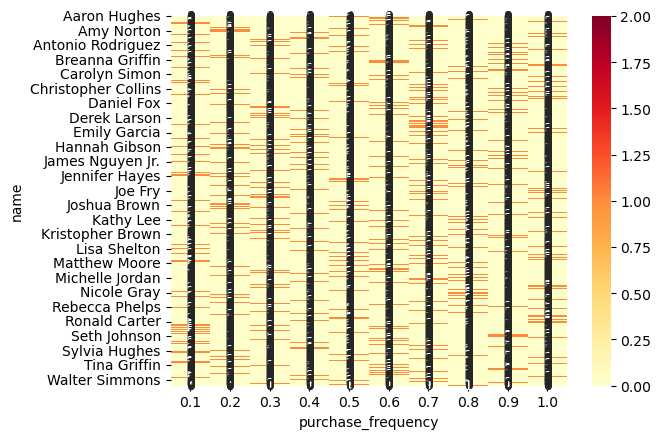

In [16]:
freq_table = pd.crosstab(data_import['name'] , data_import['purchase_frequency'])

sns.heatmap(freq_table, cmap='YlOrRd', annot=True, fmt='d')


<Axes: xlabel='purchase_frequency', ylabel='country'>

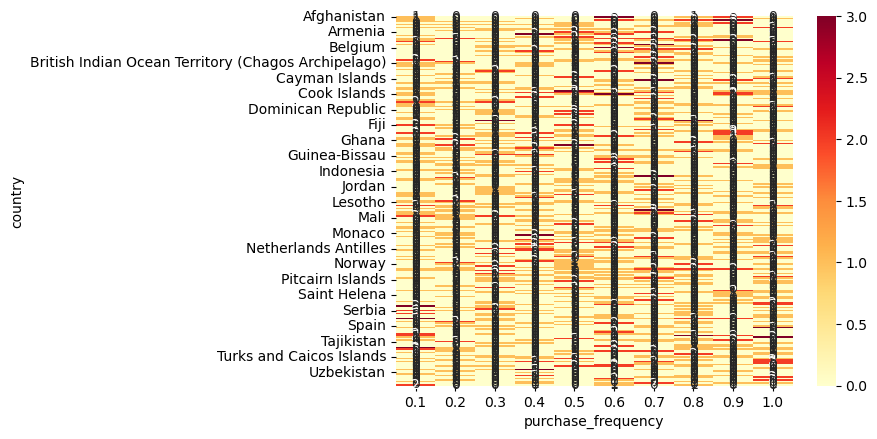

In [17]:
freq_table = pd.crosstab(data_import['country'] , data_import['purchase_frequency'])

sns.heatmap(freq_table, cmap='YlOrRd', annot=True, fmt='d')


## Data Visulization . 

##### Percentage of purchase history in Countries , plotly map. 

------------------------------------------------------------

#### 1.Relationship of label cols with other cols. 
#### 2.Countries with most purchases. 
#### 3.ratio of income to purchases {Country wise}. 

------------------------------------------------------------

## Machine Learning 
#### Label col : purchase frequency. 
#### X cols : Name and Country Excluded. 



## Data Visualization

In [18]:
## Relationship of label cols with other cols. 

data_viz_df = data_import.drop(['name','country'] , axis = 1)
print(data_viz_df.columns)

Index(['age', 'gender', 'education', 'income', 'purchase_frequency',
       'spending'],
      dtype='object')


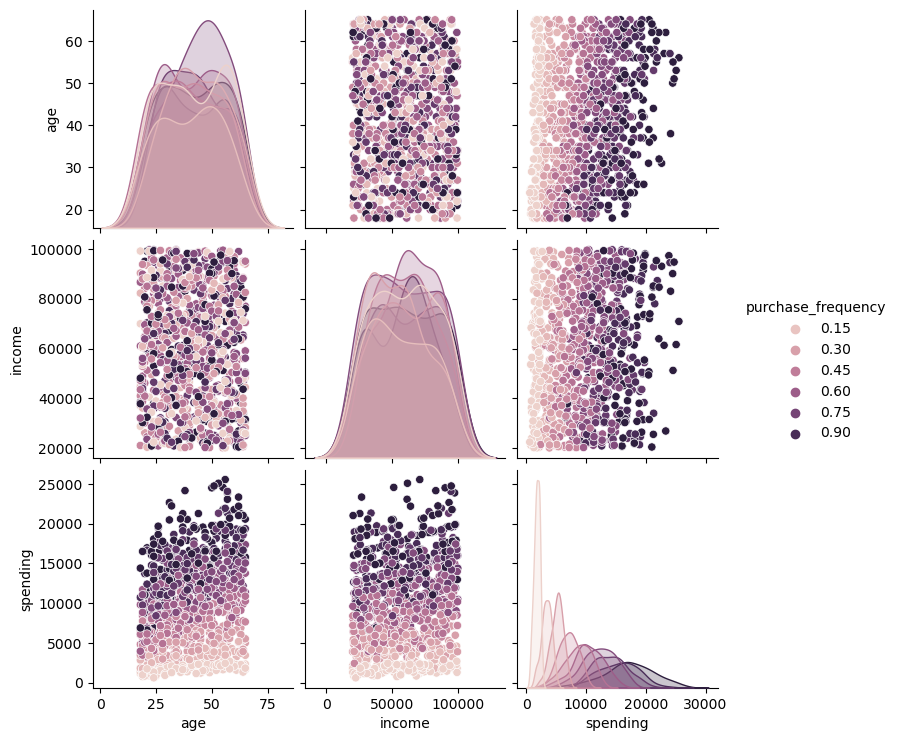

In [19]:
sns.pairplot(data_viz_df , hue = 'purchase_frequency')

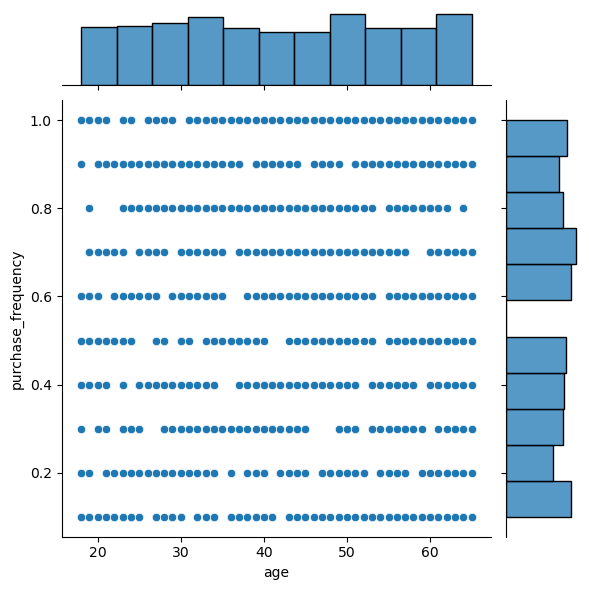

In [20]:
# Joinplot between age and purchase_frequency 

sns.jointplot(x='age', y='purchase_frequency', data=data_viz_df)


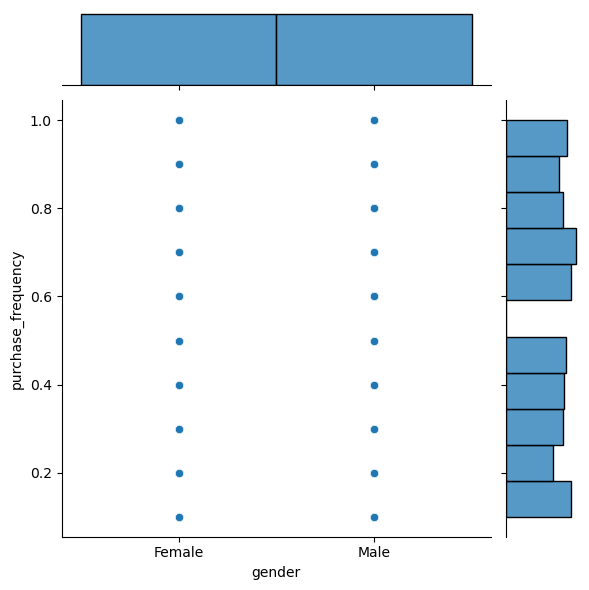

In [21]:
# Joinplot between gender and purchase_frequency 

sns.jointplot(x='gender', y='purchase_frequency', data=data_viz_df)


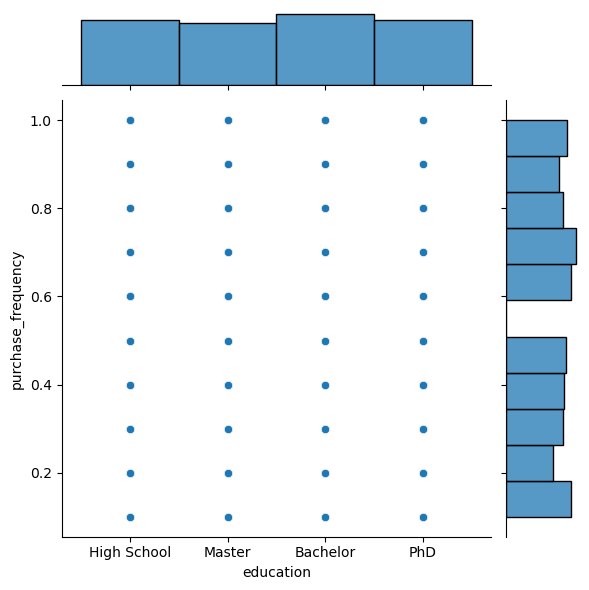

In [22]:
# Joinplot between education and purchase_frequency 

sns.jointplot(x='education', y='purchase_frequency', data=data_viz_df)


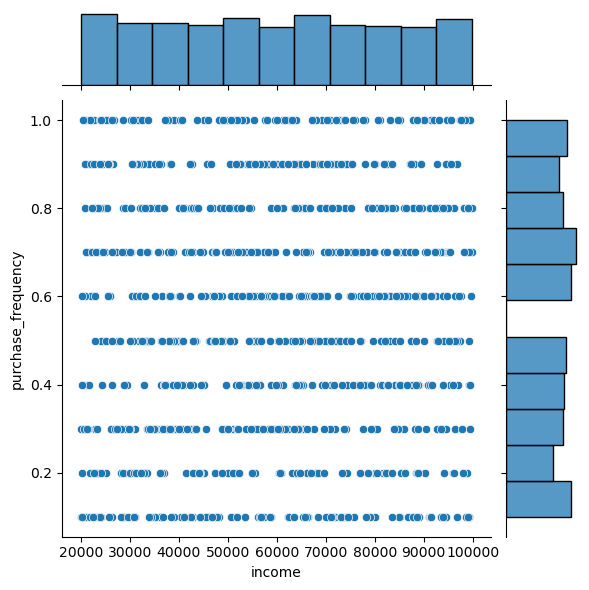

In [23]:
# Joinplot between income and purchase_frequency 

sns.jointplot(x='income', y='purchase_frequency', data=data_viz_df)


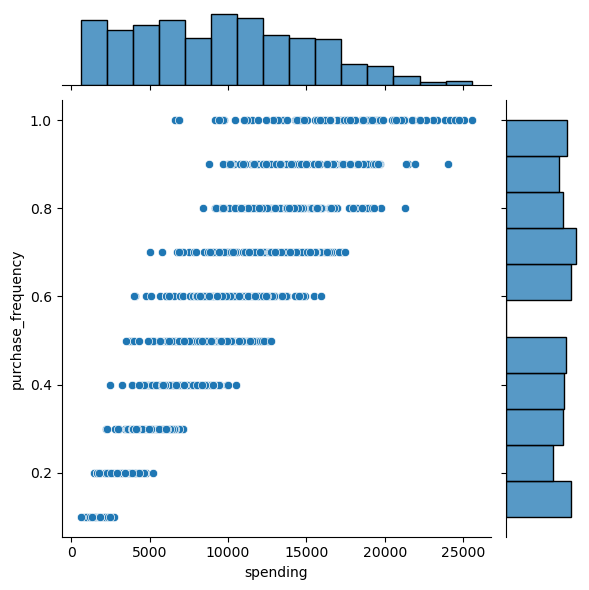

In [24]:
# Joinplot between spending and purchase_frequency 

sns.jointplot(x='spending', y='purchase_frequency', data=data_viz_df)


#### Relationship of spending with purchase_frequency makes sense , as the spending increase gradually the purchase frequency will go up but the relationship of income nad purchase_frequency doesn't show the same.


<Axes: >

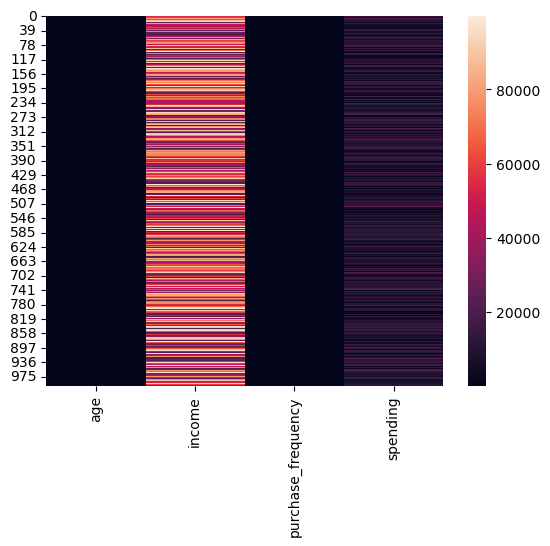

In [25]:
## heatmap of numerical cols with label col. 

sns.heatmap(num_cols_df)

In [26]:
data_import.groupby('country')['purchase_frequency'].count().sort_values(ascending = False)[:10]

country
Congo                     12
Palau                     11
Slovenia                  10
Algeria                    9
Ukraine                    9
Nigeria                    9
Azerbaijan                 9
Libyan Arab Jamahiriya     8
Ethiopia                   8
Cook Islands               8
Name: purchase_frequency, dtype: int64

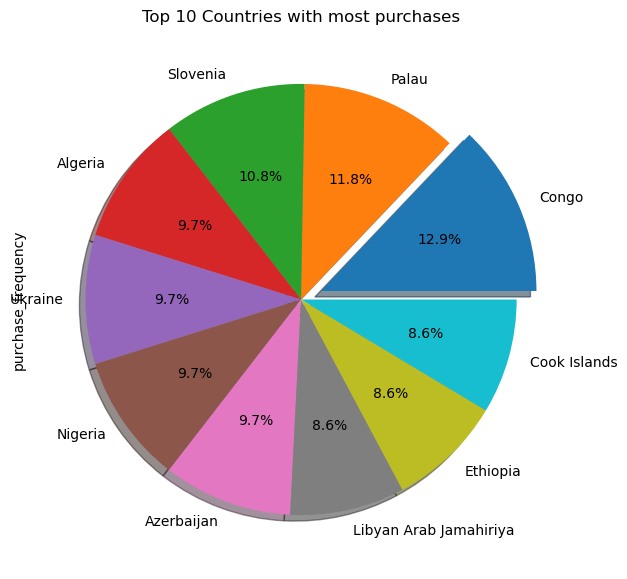

In [27]:
data_import.groupby('country')['purchase_frequency'].count().sort_values(ascending = False)[:10].plot(kind = 'pie' , autopct = '%1.1f%%' , shadow = True , explode = [0.1,0,0,0,0,0,0,0,0,0])
plt.title('Top 10 Countries with most purchases')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

<b>
    In the dataset ,<br> 
    Congo countries has most purchases history with 12.9 % followed by palau with 11.8 % 
</b>

In [28]:
len(set(data_import.country))  # Total countries in the dataset are 239. 

239

In [31]:
# Ratio of Income to max Purchases of all brackets for all unique vals of purchase_freq.

data_import.groupby('purchase_frequency')[['income','country']].max()

,income,country
purchase_frequency,,
0.1,99230,Zimbabwe
0.2,98900,Western Sahara
0.3,99532,United States of America
0.4,99484,Zambia
0.5,99203,United States Minor Outlying Islands
0.6,99582,Zimbabwe
0.7,99775,Zambia
0.8,99780,Zimbabwe
0.9,96827,Zambia


In [33]:
# Ratio of Income to min Purchases of all brackets for all unique vals of purchase_freq.

data_import.groupby('purchase_frequency')[['income','country']].min()

,income,country
purchase_frequency,,
0.1,20067,Afghanistan
0.2,20322,American Samoa
0.3,20031,American Samoa
0.4,20170,Albania
0.5,22906,Andorra
0.6,20206,Afghanistan
0.7,21104,Algeria
0.8,20931,Afghanistan
0.9,20844,Afghanistan


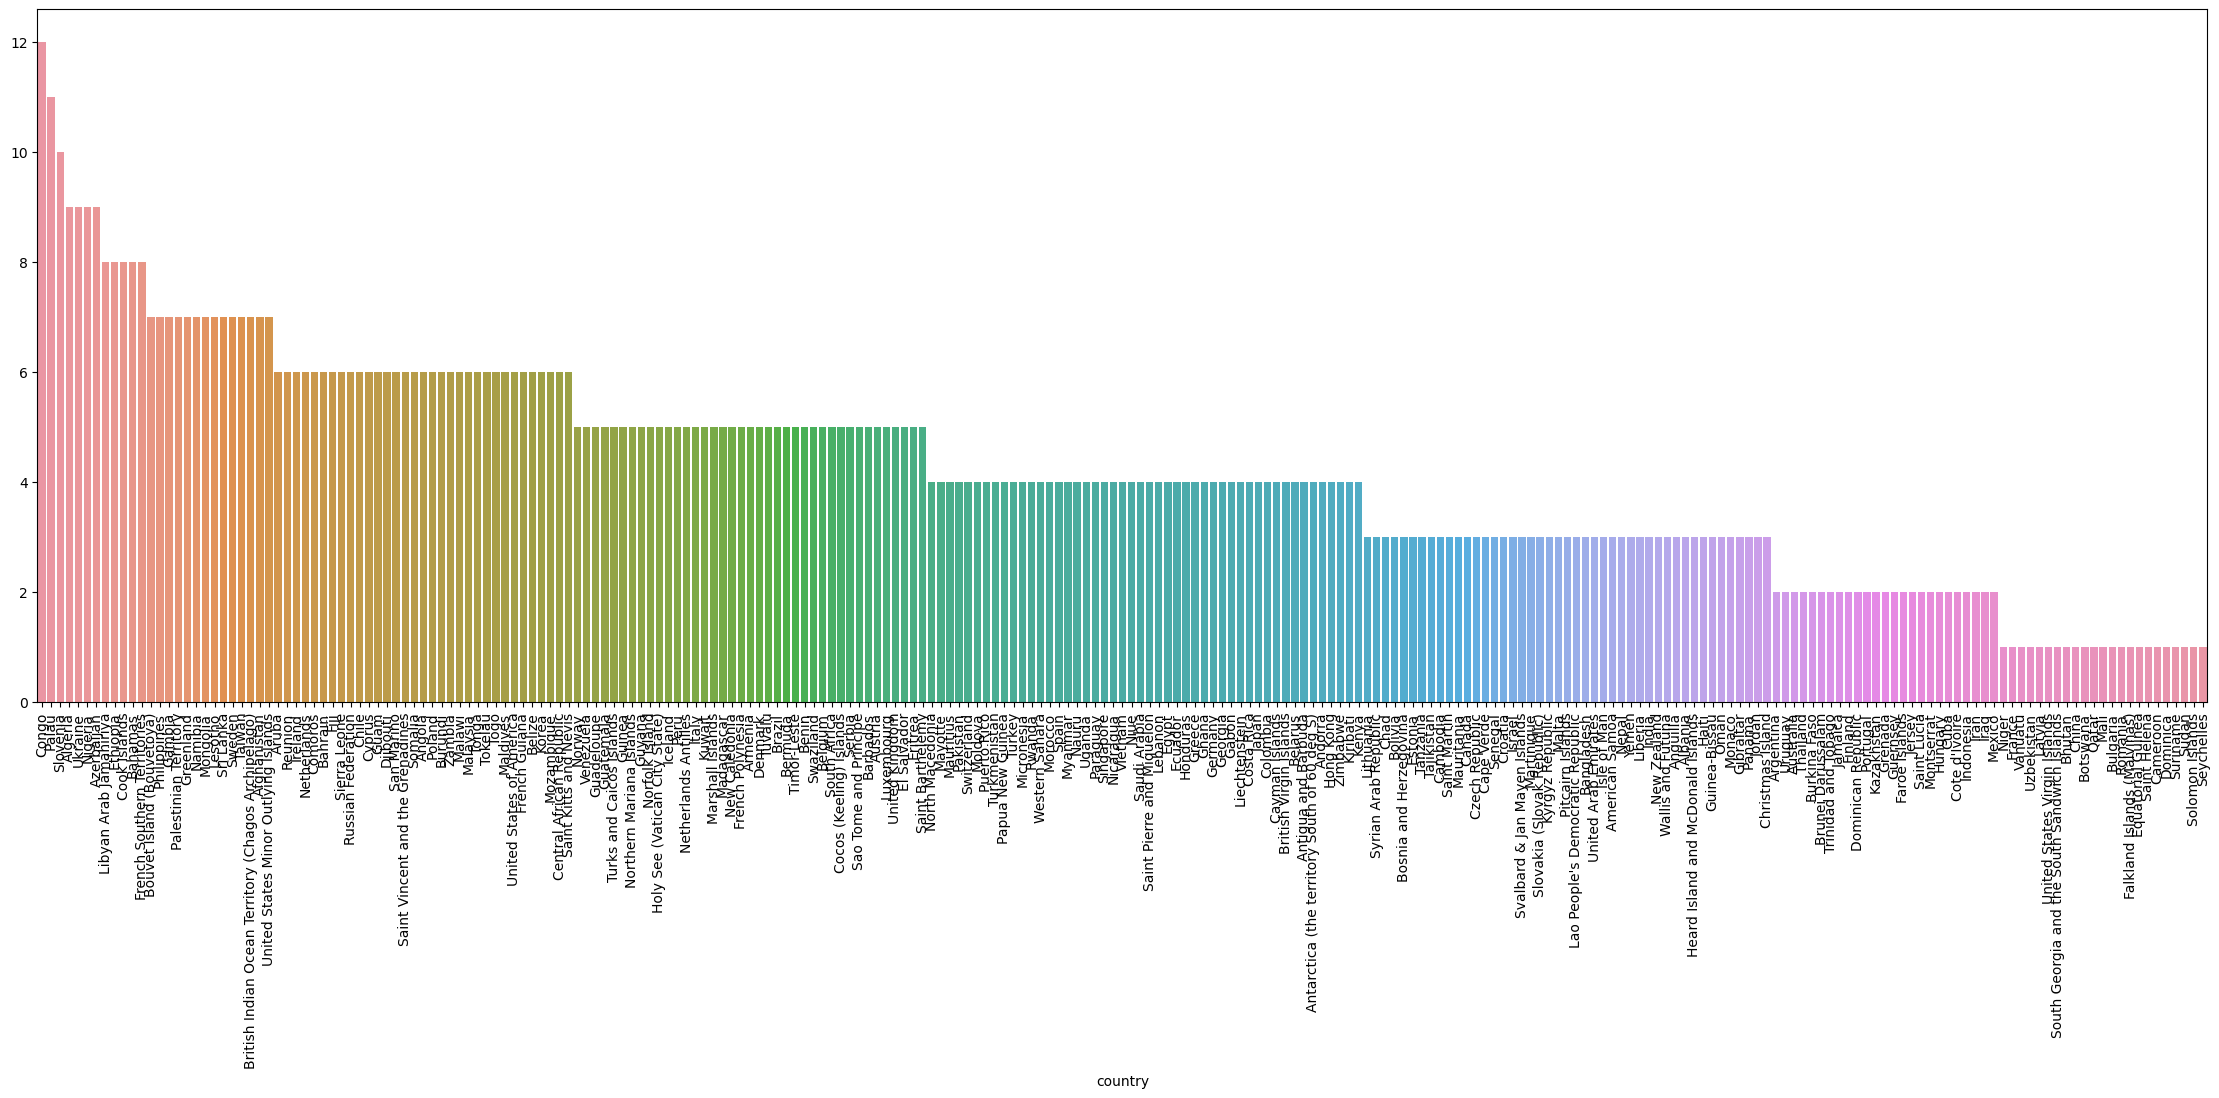

In [34]:
fig , ax = plt.subplots()

x = data_import.groupby('country')['purchase_frequency'].count().sort_values(ascending = False).index 
y = data_import.groupby('country')['purchase_frequency'].count().sort_values(ascending = False).values 


ax = sns.barplot(x = x , y = y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.set_size_inches(28, 9)
plt.show()
